# A joint multilevel model for CAR 
Using MVS.CARLeroux
## Common Markov Gaussian Random Field
 $$ [P , S ] = [P | GMRF_p] [ S | GMRF_s] $$

In [1]:
## Import code:
setwd('/apps/external_plugins/biospytial_rwrapper/biospytial.rwrapper/R/')
rm(list=ls())                                                                                     
source("init_data.R")

Loading required package: MASS
Loading required package: Rcpp

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [13]:
## Extract the response variables
Y = TDF %>% select(Pinophyta,Abies)
## Extract the formula
formula_presence
rhs <- ~ Elevationm + MeanTempm
X <- model.frame(rhs,DataFrame,na.action='na.pass')

species ~ Elevationm + MeanTempm

In [33]:
K = dim(M_bis)[1]
trials <- matrix(rep(1.0,K*2), ncol=2)

In [48]:
burnin = 29000
n.sample = 30000
thin = 1
model3 <- MVS.CARleroux(cbind(Pinophyta,Abies) ~ Elevationm + MeanTempm, 
                        family = 'binomial',
                        trials=trials,
                        W=M_bis,
                        rho = 1,
                        burnin = burnin,
                        n.sample = n.sample,
                        data = DataFrame
                         )

Setting up the model.
Generating 1000 post burnin and thinned (if requested) samples.
  |======================================================================| 100%
Summarising results.
Finished in  1260.9 seconds.


In [49]:
## model
model3$modelfit

DIC           p.d          WAIC           p.w          LMPL 
    1431.1950      477.5650     1469.9200      384.8810     -787.0843 
loglikelihood 
    -238.0325

In [50]:
model3$summary.results

,Median,2.5%,97.5%,n.sample,% accept,n.effective,Geweke.diag
Pinophyta - (Intercept),-5.9401,-6.7315,-5.1735,1000,49.8,24.1,-1.8
Pinophyta - Elevationm,0.0000,-0.0003,0.0003,1000,49.8,32.7,1.3
Pinophyta - MeanTempm,-0.0011,-0.0014,-0.0007,1000,49.8,24.8,3.2
Abies - (Intercept),-10.6395,-12.2095,-8.9471,1000,49.8,36.5,-3.3
Abies - Elevationm,0.0006,0.0000,0.0012,1000,49.8,70.8,1.5
Abies - MeanTempm,-0.0006,-0.0011,-0.0001,1000,49.8,29.0,2.7
Sigma11,31.5943,29.2040,34.0711,1000,100.0,9.0,-1.5
Sigma22,22.2829,20.8605,23.9691,1000,100.0,27.3,-0.9
rho,1.0000,1.0000,1.0000,NA,NA,NA,NA


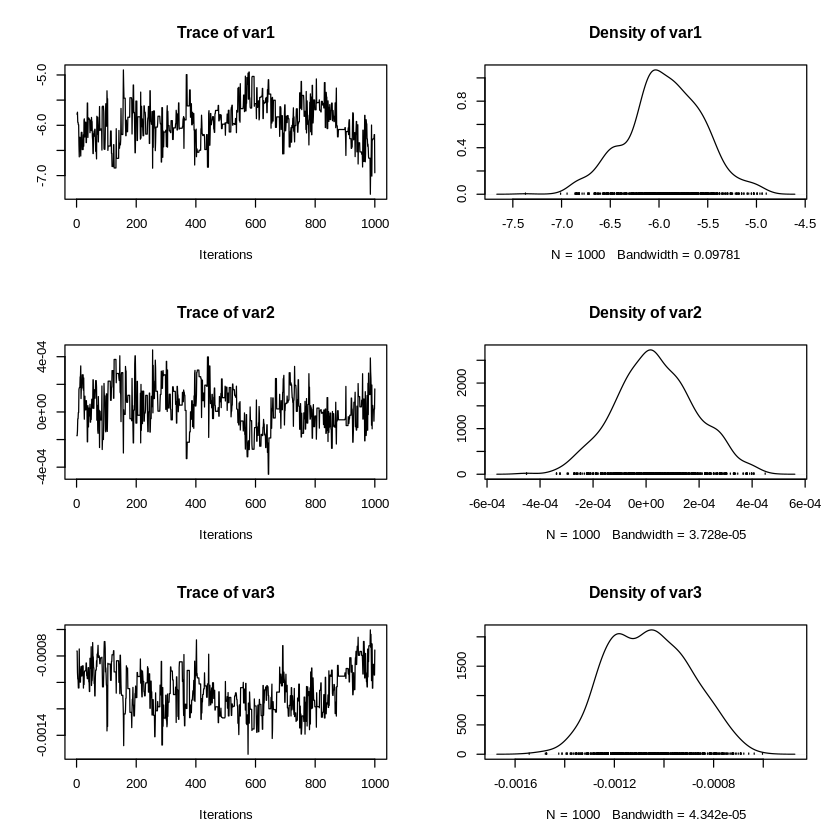

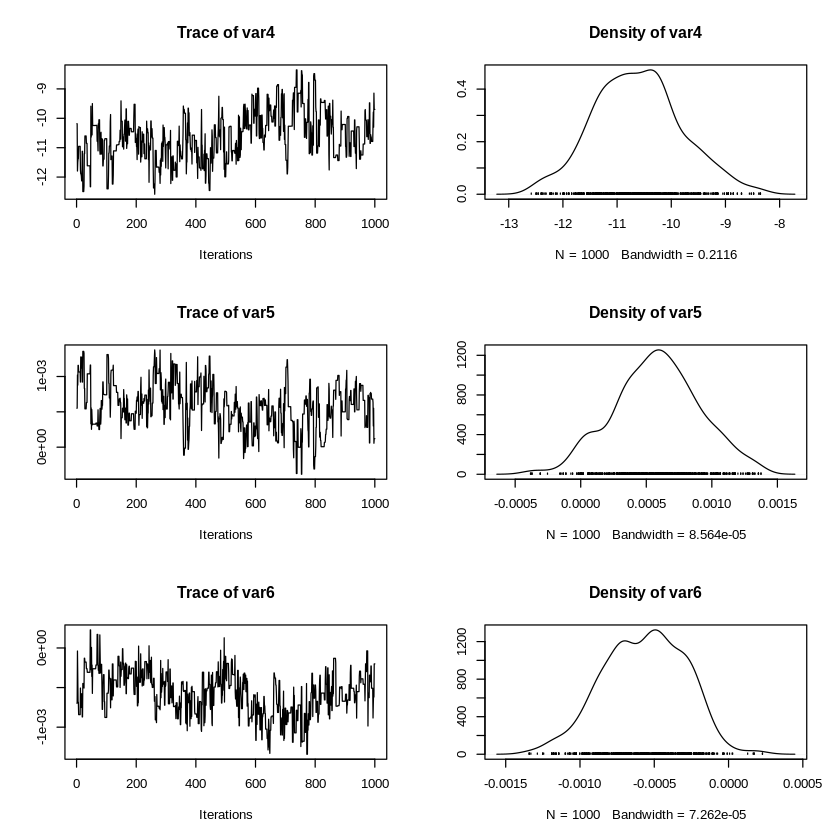

In [53]:
plot(model3$samples$beta)

In [55]:
str(model3$samples$fitted)

 'mcmc' num [1:1000, 1:8120] 4.68e-07 1.97e-07 1.37e-07 3.92e-07 6.10e-08 ...
 - attr(*, "mcpar")= num [1:3] 1 1000 1


In [56]:
str(model3$samples$Sigma)

 num [1:1000, 1:2, 1:2] 30.2 30.7 31.9 32.2 32.5 ...


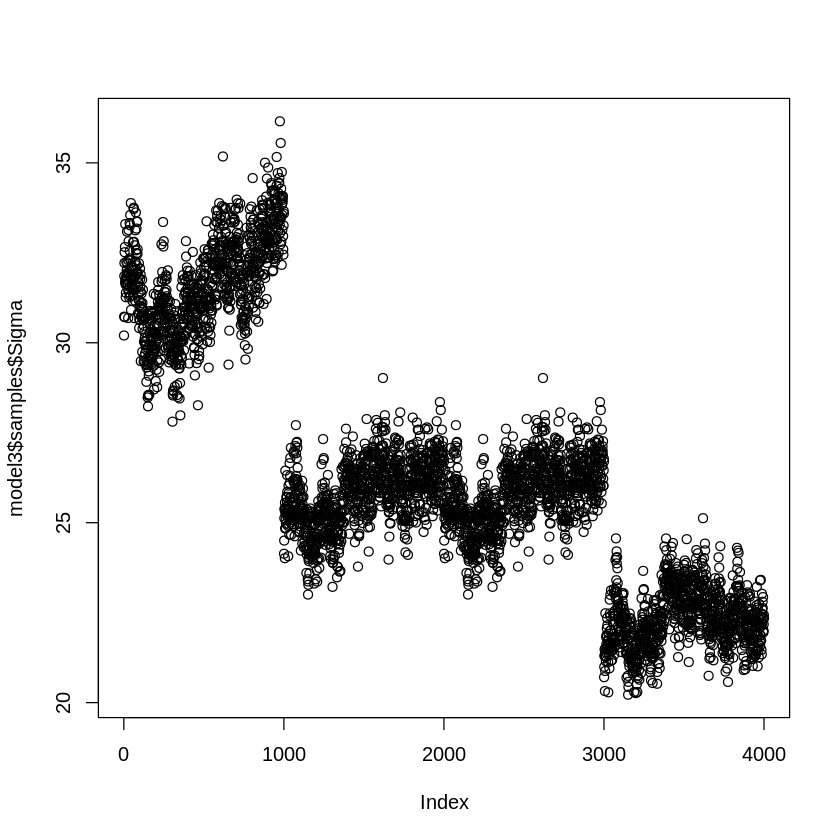

In [60]:
plot(model3$samples$Sigma)